# Actividad 21

### Crea / Presenta un algoritmo que genere los datos de "reading_score" y "math_score", en variables categóricas, y guárdalo en dos columnas diferentes (cada columna nueva representa la nueva columna con variables categórica).

In [1]:
#Descargar librerias
import pandas as pd
import numpy as np
import matplotlib as plot

In [2]:
#Traer el archivo
data_students=pd.read_csv("clean_students_complete.csv")

In [3]:
#Cambiar el indice
data_students.set_index('Student ID', inplace=True)

In [4]:
#Eliminar una conlumna
data_students=data_students.drop(["Unnamed: 0"], axis=1)
data_students.head(3)

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79
1,Victor Smith,M,12th,Huang High School,94,61
2,Kevin Rodriguez,M,12th,Huang High School,90,60


In [14]:
#Convertir a variable categoricas
data_students["cat_read"]=data_students["reading_score"]
data_students["cat_math"]=data_students["math_score"]
data_students['cat_read']=pd.Categorical(data_students.cat_read)
data_students['cat_math']=pd.Categorical(data_students.cat_math)

In [15]:
data_students["cat_read"].replace([range(0,70)], "Calificación Reprobatoria", inplace=True)
data_students["cat_read"].replace([range(70,86)], "Calificación Media", inplace=True)
data_students["cat_read"].replace([range(86,96)], "Calificación Buena", inplace=True)
data_students["cat_read"].replace([range(96,101)], "Calificación Excelente", inplace=True)
data_students["cat_math"].replace([range(0,70)], "Calificación Reprobatoria", inplace=True)
data_students["cat_math"].replace([range(70,86)], "Calificación Media", inplace=True)
data_students["cat_math"].replace([range(86,96)], "Calificación Buena", inplace=True)
data_students["cat_math"].replace([range(96,101)], "Calificación Excelente", inplace=True)
data_students

,student_name,gender,grade,school_name,reading_score,math_score,cat_read,cat_math
Student ID,,,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79,Calificación Reprobatoria,Calificación Media
1,Victor Smith,M,12th,Huang High School,94,61,Calificación Buena,Calificación Reprobatoria
2,Kevin Rodriguez,M,12th,Huang High School,90,60,Calificación Buena,Calificación Reprobatoria
3,Richard Scott,M,12th,Huang High School,67,58,Calificación Reprobatoria,Calificación Reprobatoria
4,Bonnie Ray,F,9th,Huang High School,97,84,Calificación Excelente,Calificación Media
...,...,...,...,...,...,...,...,...
39165,Donna Howard,F,12th,Thomas High School,99,90,Calificación Excelente,Calificación Buena
39166,Dawn Bell,F,10th,Thomas High School,95,70,Calificación Buena,Calificación Media
39167,Rebecca Tanner,F,9th,Thomas High School,73,84,Calificación Media,Calificación Media


<AxesSubplot:title={'center':'Gráfica por grupos de calificación de lectura'}, xlabel='school_name'>

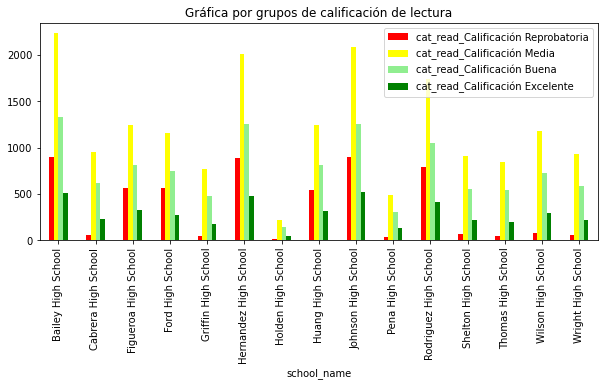

In [16]:
#Grafica de las categorías de calificaciones de lectura
cat_read_scname=data_students[["school_name","cat_read"]]
dummies_read=pd.get_dummies(cat_read_scname[["cat_read"]])
plotbycat_read=pd.concat([cat_read_scname,dummies_read],axis=1)
plot_grouped_read=plotbycat_read.groupby(["school_name"]).sum()
plot_grouped_read.plot(kind="bar",color=["red","yellow","lightgreen", "green"],figsize=(10,4), title="Gráfica por grupos de calificación de lectura")

<AxesSubplot:title={'center':'Gráfica por grupos de calificación de matemáticas'}, xlabel='school_name'>

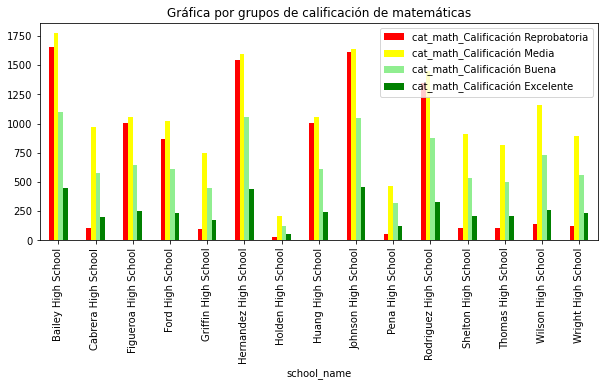

In [17]:
#Grafica de las categorías de calificaciones de matematicas
cat_math_scname=data_students[["school_name","cat_math"]]
dummies_math=pd.get_dummies(cat_math_scname[["cat_math"]])
plotbycat_math=pd.concat([cat_math_scname,dummies_math],axis=1)
plot_grouped_math=plotbycat_math.groupby(["school_name"]).sum()
plot_grouped_math.plot(kind="bar",color=["red","yellow","lightgreen", "green"],figsize=(10,4), title="Gráfica por grupos de calificación de matemáticas")